# Project 3 

In [1]:
#Load python libraries and sklear linear model library
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import linear_model

<class 'pandas.core.frame.DataFrame'>
2


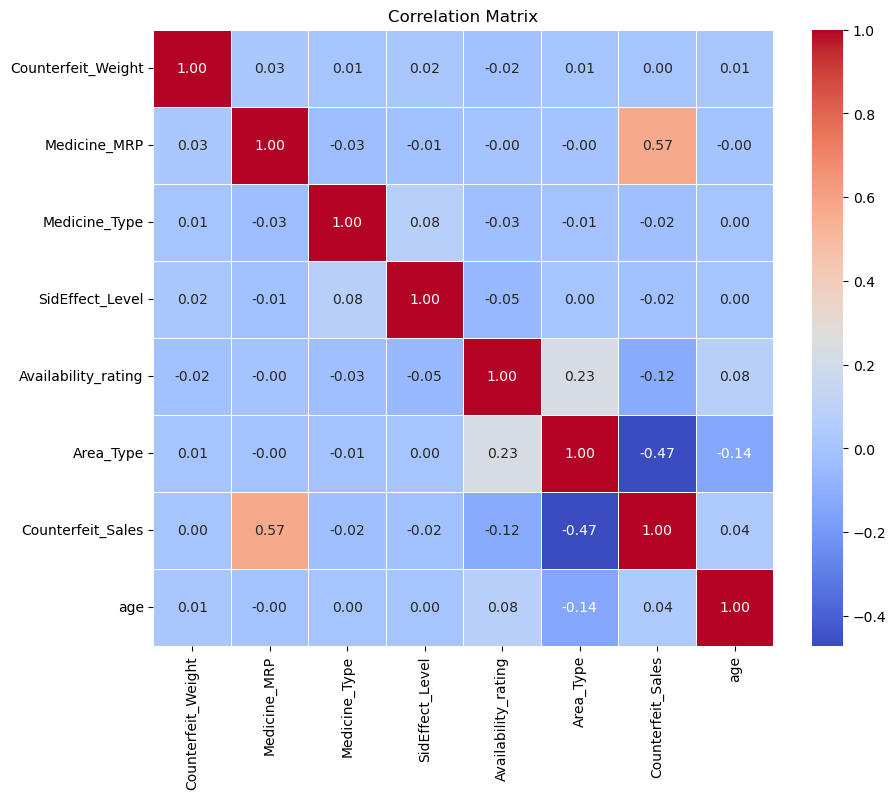

Mean Absolute Error: 804.5072182973119
Mean Squared Error: 1351188.3336751317
R-squared: 0.5495711719226966


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

#Read the .csv and load into DataFrame
df=pd.read_csv("counterfeit_train.csv")
df

print(type(df))
df.head()

from sklearn.preprocessing import LabelEncoder

print(df['SidEffect_Level'].nunique())
# Assuming df is your DataFrame
label_encoder = LabelEncoder()
df['SidEffect_Level'] = label_encoder.fit_transform(df['SidEffect_Level'])
df['Area_Type'] = label_encoder.fit_transform(df['Area_Type'])
df['age'] = 2024 - df['Active_Since']
columns_to_drop = ["Active_Since", "Medicine_ID" , "DistArea_ID"  , "Area_City_Type" , "Area_dist_level" ]
df = df.drop(columns_to_drop, axis=1)

mean_weight = df['Counterfeit_Weight'].mean()
# Fill null values with the mean
df['Counterfeit_Weight'].fillna(mean_weight, inplace=True)

df["Medicine_Type"] = label_encoder.fit_transform(df["Medicine_Type"])
df.head()

df_numeric = df.select_dtypes(include='number').dropna()

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


variable1 = 'Availability_rating'
variable2 = 'Counterfeit_Sales'

# Create a scatter plot
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=variable1, y=variable2, data=df_numeric)
# plt.title(f'Scatter Plot between {variable1} and {variable2}')
# plt.show()


Final_features = ["Area_Type" , "Medicine_MRP" , "Availability_rating"]
lable = ["Counterfeit_Sales"]


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Drop rows with null values for simplicity
df_selected = df[["Area_Type", "Medicine_MRP", "Availability_rating", "Counterfeit_Sales"]].dropna()

# Split the data into features and target variable
X = df_selected[["Area_Type", "Medicine_MRP", "Availability_rating"]]
y = df_selected["Counterfeit_Sales"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

model2 = RandomForestRegressor()
model2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

y2_pred = model2.predict(X_test)


# Evaluate the model
mae = mean_absolute_error(y_test , y2_pred)
mse = mean_squared_error(y_test, y2_pred)
r2 = r2_score(y_test, y2_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# # Visualize the predicted vs. actual values
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=y_test, y=y_pred)
# plt.xlabel("Actual Counterfeit Sales")
# plt.ylabel("Predicted Counterfeit Sales")
# plt.title("Actual vs. Predicted Counterfeit Sales")
# plt.show()




Total null value is : 1166
Unique medicine types :  16
 Highest number of counterfiet drugs :  DownTown
Medicine type has the lowest count : Antiviral
Lowest value of counterfiet sales : 146


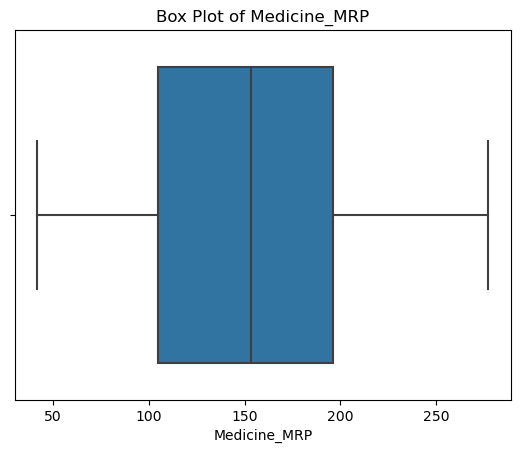

In [6]:
#Read the .csv and load into DataFrame
df=pd.read_csv("counterfeit_train.csv")
df

#Quiz-1 Number of columns containing missing values in the training dataset. (Please write the number instead of a word)
print("Total null value is :", df.isnull().sum().sum())

#Quiz-2 How many unique medicine types are present in the training dataset?
x = df["Medicine_Type"].nunique()
print("Unique medicine types : " , x)

#Quiz-3 Which area type has the highest number of counterfiet drugs?

y = df.groupby("Area_Type")["Counterfeit_Sales"].count()
print(" Highest number of counterfiet drugs : " , y.idxmax())

#Quiz-4 Which medicine type has the lowest count in the training dataset?
z = df["Medicine_Type"].value_counts().idxmin()
print("Medicine type has the lowest count :" ,z)

#Quiz-5 What is the lowest value of counterfiet sales in the training dataset?
a = round(df["Counterfeit_Sales"].min())
print("Lowest value of counterfiet sales :" ,a)

#Quiz-6 'Medicine_MRP' column does not contain any outliers.
import seaborn as sns
sns.boxplot(x=df['Medicine_MRP'])
plt.title('Box Plot of Medicine_MRP')
plt.show()

In [18]:
#Lets Explore the Data
# print(df.info())
# print("\n")
# print(df.describe()) 
df.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [5]:
df.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
       'Counterfeit_Sales'],
      dtype='object')

In [6]:
df.fillna(0, inplace=True) # Replace NaN values with 0 or use other strategies

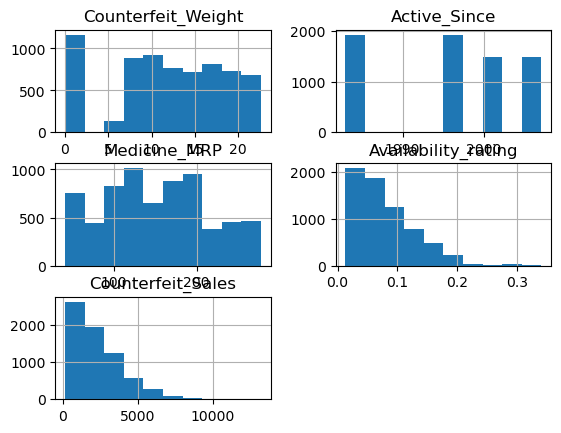

In [7]:
df.columns
cdf=df[['Counterfeit_Weight', 'DistArea_ID', 'Active_Since', 'Medicine_MRP', 'Availability_rating' , 'Counterfeit_Sales']]  ### Selected appended and DataFrame create
# cdf.head()
cdf.hist()
plt.show()

In [8]:
#ChatGPT Approach 🫠

import matplotlib.pyplot as plt



In [9]:
df.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,0.000,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,0.000,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [18]:
df1 = df[['Counterfeit_Weight' , 'Medicine_MRP' , 'Availability_rating' , 'Counterfeit_Sales']]
df1.columns
df1.head()

X = df1.drop(columns = 'Counterfeit_Sales')
X
y = df1['Counterfeit_Sales']

In [20]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [21]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression ()

In [22]:
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
c = lr.intercept_
c

463.9106017418733

In [25]:
y_pred_train = lr.predict(X_train)
y_pred_train

array([3864.3457908 , 2832.37534231,  786.8307346 , ..., 2732.71656732,
       1644.21913407, 1926.23257949])

In [27]:
from sklearn.metrics import mean_absolute_error

# Assuming you have actual target values (y_true) and predicted values (y_pred)
y_true = y_train  # Replace with your actual target values
y_pred = y_pred_train  # Replace with your predicted values

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)

# Print the result
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 1021.8179071628728


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load the training data
train_data = pd.read_csv('counterfeit_train.csv')

# Explore the data
print(train_data.head())  # Display the first few rows
print(train_data.info())  # Display information about the dataset

# Handle missing values if needed
train_data = train_data.dropna()  # Example: drop rows with missing values

# Assuming 'Counterfeit_Sales' is the target variable
y = train_data['Counterfeit_Sales']

# Drop unnecessary columns and columns that are directly used as features
# For example, 'Medicine_ID' might not be useful for predictions
X = train_data.drop(['Counterfeit_Sales', 'Medicine_ID'], axis=1)

# Handle categorical variables
categorical_columns = ['DistArea_ID', 'Medicine_Type', 'SidEffect_Level', 'Area_Type', 'Area_City_Type', 'Area_dist_level']
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
print(X.head())
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Build a Random Forest Regressor model
model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')


  Medicine_ID  Counterfeit_Weight DistArea_ID  Active_Since  Medicine_MRP  \
0       RRA15              13.100     Area046          1995      160.2366   
1       YVV26                 NaN     Area027          1983      110.4384   
2       LJC15               9.025     Area046          1995      259.4092   
3       GWC40              11.800     Area046          1995       99.9830   
4       QMN13                 NaN     Area019          1983       56.4402   

        Medicine_Type SidEffect_Level  Availability_rating  \
0        Antimalarial        critical             0.070422   
1         Mstablizers            mild             0.013000   
2             Cardiac            mild             0.060783   
3  OralContraceptives            mild             0.065555   
4       Hreplacements        critical             0.248859   

            Area_Type Area_City_Type Area_dist_level  Counterfeit_Sales  
0            DownTown         Tier 1           Small          1775.5026  
1          CityL